# Problem: Implement Linear Regression

### Problem Statement
Your task is to implement a **Linear Regression** model using PyTorch. The model should predict a continuous target variable based on a given set of input features.

### Requirements
1. **Model Definition**:
   - Implement a class `LinearRegressionModel` with:
     - A single linear layer mapping input features to the target variable.
2. **Forward Method**:
   - Implement the `forward` method to compute predictions given input data.

# My Solution

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

In [15]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * X + 3 + torch.randn(100, 1)  # Linear relationship with noise

# Define the Linear Regression Model
#TODO: Add the layer and forward implementation
class LinearRegressionModel(nn.Module):
    def __init__(self):

        super().__init__()
        self.linear = torch.nn.Linear(1,1) # Can be done with w and b manually
        # self.linear = torch.nn.Parameter(torch.randn(1))
        # self.bias = torch.nn.Parameter(torch.randn(1) * 100)

    def forward(self, x):
        return self.linear(x)
        # self.linear * x + self.bias
# Initialize the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 1.6039
Epoch [200/1000], Loss: 1.0242
Epoch [300/1000], Loss: 0.8017
Epoch [400/1000], Loss: 0.7163
Epoch [500/1000], Loss: 0.6836
Epoch [600/1000], Loss: 0.6710
Epoch [700/1000], Loss: 0.6662
Epoch [800/1000], Loss: 0.6643
Epoch [900/1000], Loss: 0.6636
Epoch [1000/1000], Loss: 0.6634


In [16]:
# Display the learned parameters
[w, b] = model.linear.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Testing on new data
X_test = torch.tensor([[4.0], [7.0]])
with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for {X_test.tolist()}: {predictions.tolist()}")

Learned weight: 1.9577, Learned bias: 3.2045
Predictions for [[4.0], [7.0]]: [[11.035286903381348], [16.90837860107422]]


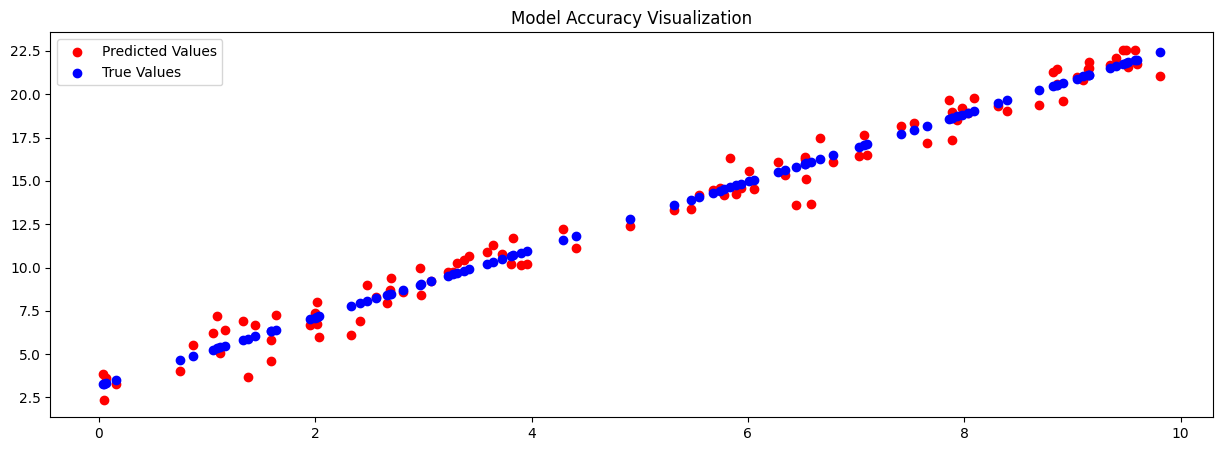

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.scatter(X, y, c = 'r', label = 'True Values')
plt.scatter(X, model(X).detach().numpy(), c = 'b', label = 'Predicted Values')
plt.title('Model Accuracy Visualization')
plt.legend(['Predicted Values', 'True Values'])
plt.show()